In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Relation between Surprisal and RT

In [2]:
df = pd.read_csv('data/ia_Paragraph_with_pythia_surprisal.csv')

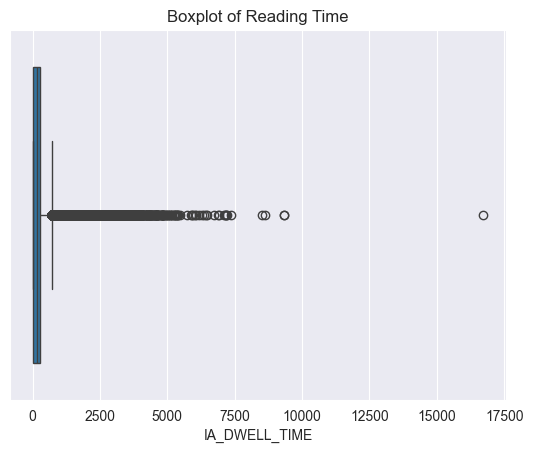

lower_bound: 0
upper_bound: 717.5


In [3]:
sns.boxplot(x=df["IA_DWELL_TIME"])
plt.title("Boxplot of Reading Time")
plt.show()


Q1 = df["IA_DWELL_TIME"].quantile(0.25)
Q3 = df["IA_DWELL_TIME"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
lower_bound = lower_bound if lower_bound > 0 else 0
upper_bound = Q3 + 1.5 * IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

## Trigram

In [7]:
tmp = df[(df['IA_DWELL_TIME'] >= lower_bound*2) & (df['IA_DWELL_TIME'] <= upper_bound*2)]
tmp = tmp[~tmp['trigram_surprisal'].isnull()]

X = tmp['trigram_surprisal']
y = tmp['IA_DWELL_TIME']

X = sm.add_constant(X)

lin_model = sm.OLS(y, X).fit()

# Extract the coefficient, t-score, p-value, and R² score
slope = lin_model.params['trigram_surprisal']
t_score = lin_model.tvalues['trigram_surprisal']
p_value = lin_model.pvalues['trigram_surprisal']
r2 = lin_model.rsquared

print(lin_model.summary())
print(f"Slope (coefficient for Trigram Surprisal): {slope:.4f}")
print(f"T-score: {t_score:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R² score: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:          IA_DWELL_TIME   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                 8.277e+04
Date:                Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:32:35   Log-Likelihood:            -6.2800e+06
No. Observations:              928513   AIC:                         1.256e+07
Df Residuals:                  928511   BIC:                         1.256e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                78.7010      0.44

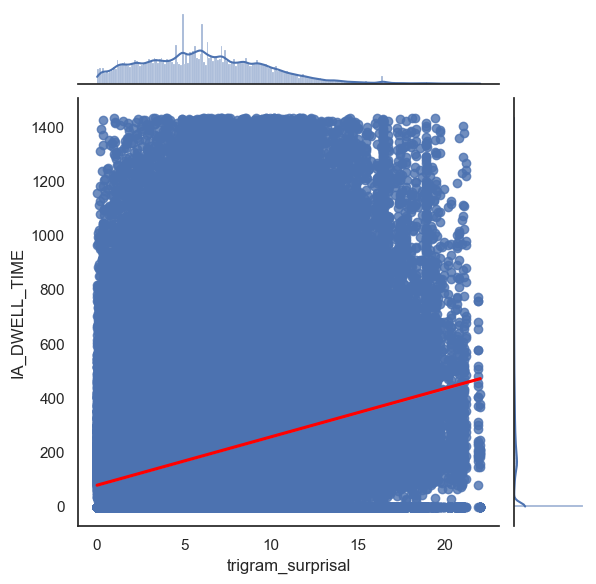

In [8]:
sns.set(style="white", color_codes=True)

g = sns.jointplot(x="trigram_surprisal", y="IA_DWELL_TIME", data=tmp, kind='reg') #mean_rt
# We're going to make the regression line red so it's easier to see
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

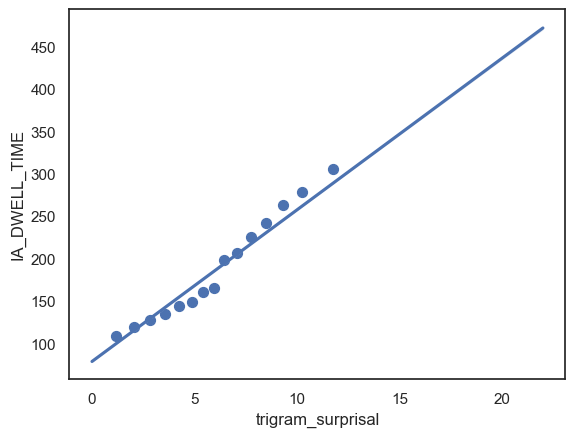

In [9]:
g = sns.regplot(x="trigram_surprisal", y="IA_DWELL_TIME", data=tmp, x_bins=15)
# g.set_ylim([250, 350])

### "SpillOver" effect

In [10]:
tmp['trigram_word_probability'] = tmp['trigram_surprisal'].apply(
        lambda s: np.exp(-s) if pd.notnull(s) else None
    )

spillovers = []
for idx in range(len(tmp)):
    if idx == len(tmp) - 1:
        spillovers.append(None)
        continue
    row = tmp.iloc[idx]
    next_row = tmp.iloc[idx + 1]
    if row['paragraph'] == next_row['paragraph']:
        spillovers.append(next_row['IA_DWELL_TIME'])
    else:
        spillovers.append(None)
tmp['spillover_rt'] = spillovers

#### Current word

In [11]:
tmp = tmp.dropna(subset=['trigram_word_probability', 'IA_DWELL_TIME'])

X = tmp['trigram_word_probability']
y = tmp['IA_DWELL_TIME']

X = sm.add_constant(X)

lin_model = sm.OLS(y, X).fit()

# Extract the coefficient, t-score, p-value, and R² score
slope = lin_model.params['trigram_word_probability']
t_score = lin_model.tvalues['trigram_word_probability']
p_value = lin_model.pvalues['trigram_word_probability']
r2 = lin_model.rsquared

print(lin_model.summary())
print(f"Slope (coefficient for Word Probability (Trigram)): {slope:.4f}")
print(f"T-score: {t_score:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R² score: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:          IA_DWELL_TIME   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                 1.896e+04
Date:                Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:34:57   Log-Likelihood:            -6.3103e+06
No. Observations:              928513   AIC:                         1.262e+07
Df Residuals:                  928511   BIC:                         1.262e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

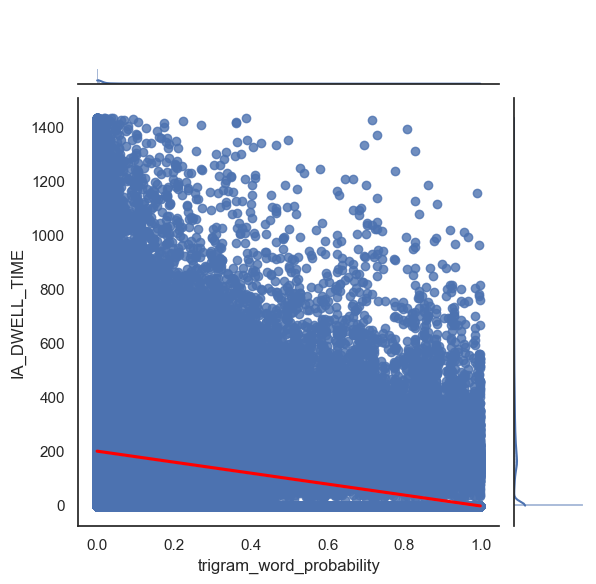

In [12]:
sns.set(style="white", color_codes=True)

g = sns.jointplot(x="trigram_word_probability", y="IA_DWELL_TIME", data=tmp, kind='reg')
# We're going to make the regression line red so it's easier to see
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

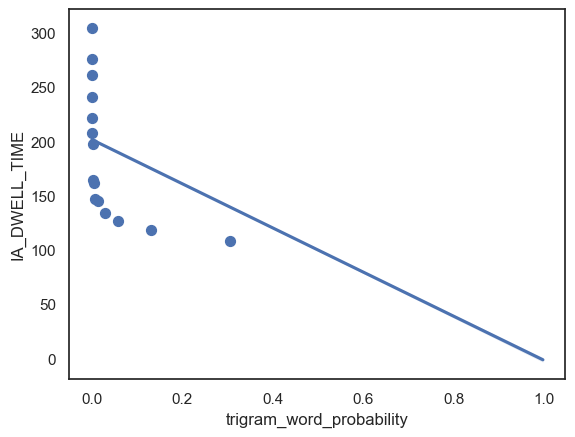

In [13]:
g = sns.regplot(x="trigram_word_probability", y="IA_DWELL_TIME", data=tmp, x_bins=15)
# g.set_ylim([175, 205])

#### Next word

In [14]:
tmp = tmp.dropna(subset=['trigram_word_probability', 'spillover_rt'])

X = tmp['trigram_word_probability']
y = tmp['spillover_rt']

X = sm.add_constant(X)

lin_model = sm.OLS(y, X).fit()

# Extract the coefficient, t-score, p-value, and R² score
slope = lin_model.params['trigram_word_probability']
t_score = lin_model.tvalues['trigram_word_probability']
p_value = lin_model.pvalues['trigram_word_probability']
r2 = lin_model.rsquared

print(lin_model.summary())
print(f"Slope (coefficient for Word Probability (Trigram)): {slope:.4f}")
print(f"T-score: {t_score:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R² score: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:           spillover_rt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     55.40
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           9.86e-14
Time:                        17:39:30   Log-Likelihood:            -6.2492e+06
No. Observations:              918435   AIC:                         1.250e+07
Df Residuals:                  918433   BIC:                         1.250e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

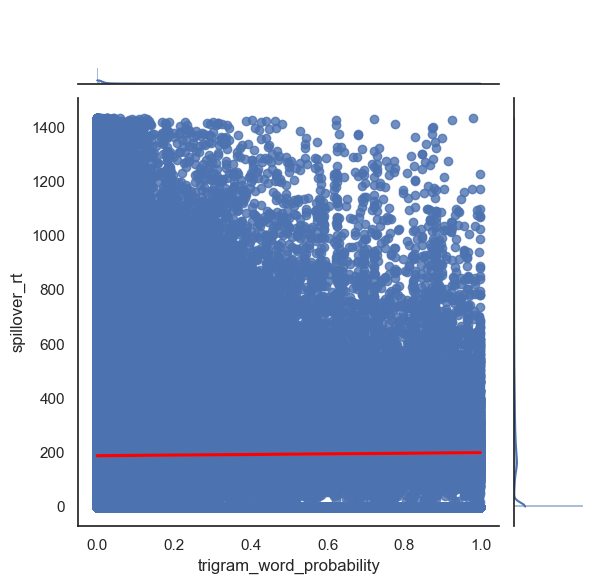

In [15]:
sns.set(style="white", color_codes=True)

g = sns.jointplot(x="trigram_word_probability", y="spillover_rt", data=tmp, kind='reg')
# We're going to make the regression line red so it's easier to see
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

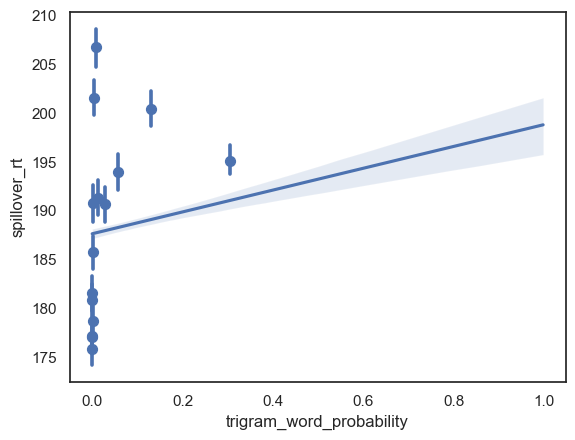

In [16]:
g = sns.regplot(x="trigram_word_probability", y="spillover_rt", data=tmp, x_bins=15)
# g.set_ylim([175, 205])

## Neural Model (Pythia)

In [17]:
tmp = df[(df['IA_DWELL_TIME'] >= lower_bound*2) & (df['IA_DWELL_TIME'] <= upper_bound*2)]
tmp = tmp[~tmp['pythia_surprisal'].isnull()]

X = tmp['pythia_surprisal']
y = tmp['IA_DWELL_TIME']

X = sm.add_constant(X)

lin_model = sm.OLS(y, X).fit()

# Extract the coefficient, t-score, p-value, and R² score
slope = lin_model.params['pythia_surprisal']
t_score = lin_model.tvalues['pythia_surprisal']
p_value = lin_model.pvalues['pythia_surprisal']
r2 = lin_model.rsquared

print(lin_model.summary())
print(f"Slope (coefficient for Pythia Surprisal): {slope:.4f}")
print(f"T-score: {t_score:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R² score: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:          IA_DWELL_TIME   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sat, 07 Jun 2025   Prob (F-statistic):          1.74e-320
Time:                        17:48:20   Log-Likelihood:            -7.4401e+06
No. Observations:             1090031   AIC:                         1.488e+07
Df Residuals:                 1090029   BIC:                         1.488e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              184.8508      0.353  

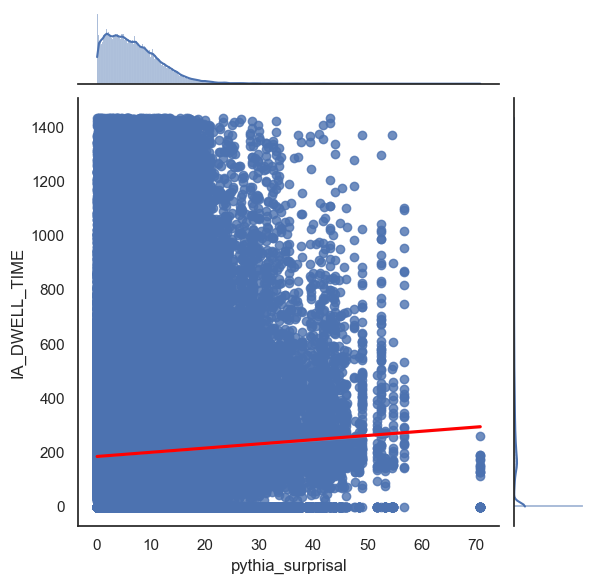

In [18]:
sns.set(style="white", color_codes=True)

g = sns.jointplot(x="pythia_surprisal", y="IA_DWELL_TIME", data=tmp, kind='reg') #mean_rt
# We're going to make the regression line red so it's easier to see
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

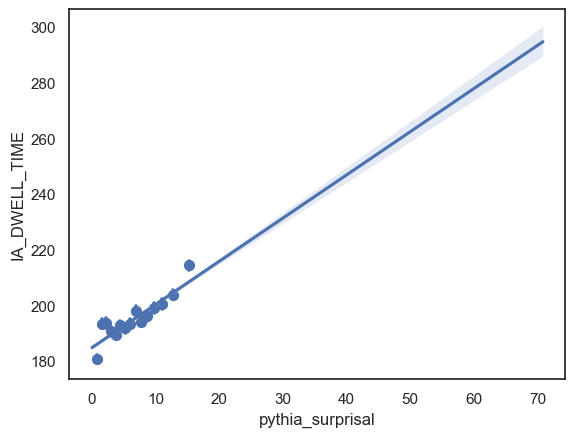

In [19]:
g = sns.regplot(x="pythia_surprisal", y="IA_DWELL_TIME", data=tmp, x_bins=15)
# g.set_ylim([180, 220])
# g.set_xlim([0, 20])

### "SpillOver" effect

In [20]:
tmp['pythia_word_probability'] = tmp['pythia_surprisal'].apply(
        lambda s: 2 ** (-s) if pd.notnull(s) else None
    )

spillovers = []
for idx in range(len(tmp)):
    if idx == len(tmp) - 1:
        spillovers.append(None)
        continue
    row = tmp.iloc[idx]
    next_row = tmp.iloc[idx + 1]
    if row['paragraph'] == next_row['paragraph']:
        spillovers.append(next_row['IA_DWELL_TIME'])
    else:
        spillovers.append(None)
tmp['spillover_rt'] = spillovers

#### Current word

In [21]:
tmp = tmp.dropna(subset=['pythia_word_probability', 'IA_DWELL_TIME'])

X = tmp['pythia_word_probability']
y = tmp['IA_DWELL_TIME']

X = sm.add_constant(X)

lin_model = sm.OLS(y, X).fit()

# Extract the coefficient, t-score, p-value, and R² score
slope = lin_model.params['pythia_word_probability']
t_score = lin_model.tvalues['pythia_word_probability']
p_value = lin_model.pvalues['pythia_word_probability']
r2 = lin_model.rsquared

print(lin_model.summary())
print(f"Slope (coefficient for Word Probability (Pythia)): {slope:.4f}")
print(f"T-score: {t_score:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R² score: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:          IA_DWELL_TIME   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     747.3
Date:                Sat, 07 Jun 2025   Prob (F-statistic):          1.74e-164
Time:                        17:51:18   Log-Likelihood:            -7.4404e+06
No. Observations:             1090031   AIC:                         1.488e+07
Df Residuals:                 1090029   BIC:                         1.488e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

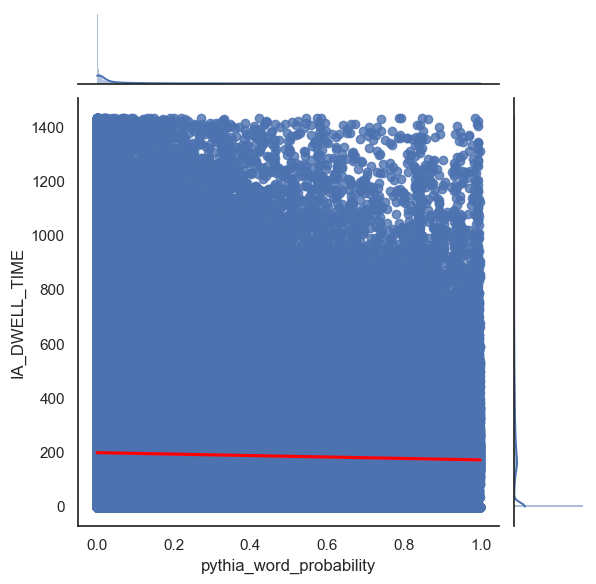

In [22]:
sns.set(style="white", color_codes=True)

g = sns.jointplot(x="pythia_word_probability", y="IA_DWELL_TIME", data=tmp, kind='reg') #mean_rt
# We're going to make the regression line red so it's easier to see
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

(175.0, 205.0)

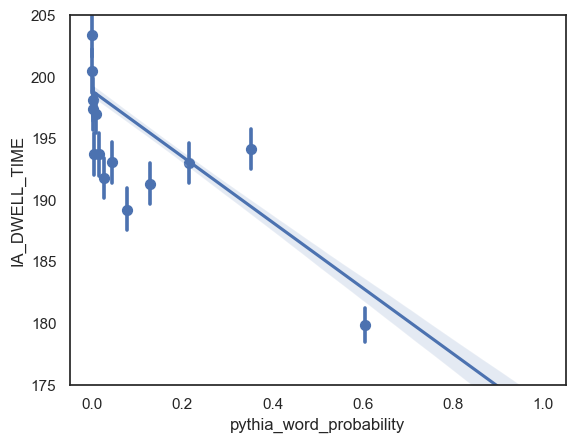

In [23]:
g = sns.regplot(x="pythia_word_probability", y="IA_DWELL_TIME", data=tmp, x_bins=15)
g.set_ylim([175, 205])

#### Next word

In [24]:
tmp = tmp.dropna(subset=['pythia_word_probability', 'spillover_rt'])

X = tmp['pythia_word_probability']
y = tmp['spillover_rt']

X = sm.add_constant(X)

lin_model = sm.OLS(y, X).fit()

# Extract the coefficient, t-score, p-value, and R² score
slope = lin_model.params['pythia_word_probability']
t_score = lin_model.tvalues['pythia_word_probability']
p_value = lin_model.pvalues['pythia_word_probability']
r2 = lin_model.rsquared

print(lin_model.summary())
print(f"Slope (coefficient for Word Probability (Pythia)): {slope:.4f}")
print(f"T-score: {t_score:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R² score: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:           spillover_rt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     91.85
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           9.39e-22
Time:                        17:53:21   Log-Likelihood:            -7.3707e+06
No. Observations:             1079953   AIC:                         1.474e+07
Df Residuals:                 1079951   BIC:                         1.474e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

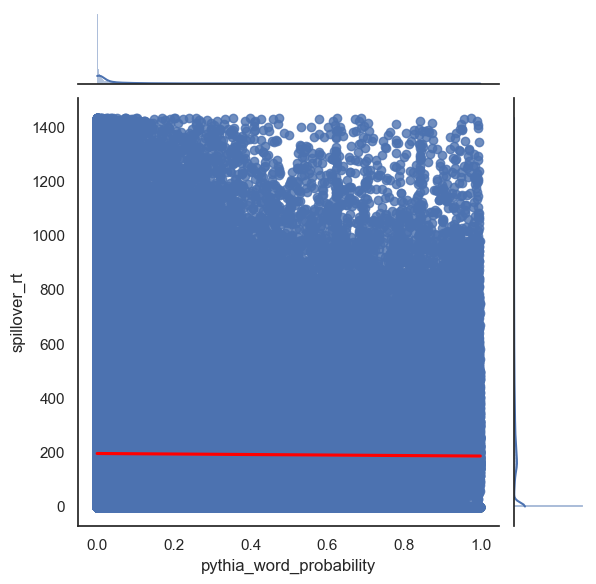

In [25]:
sns.set(style="white", color_codes=True)

g = sns.jointplot(x="pythia_word_probability", y="spillover_rt", data=tmp, kind='reg') #mean_rt
# We're going to make the regression line red so it's easier to see
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

(175.0, 205.0)

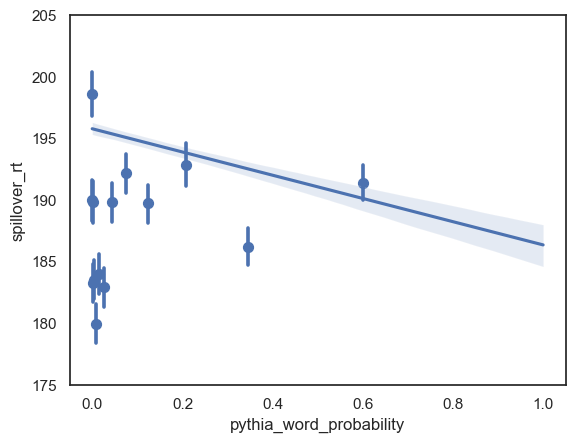

In [26]:
g = sns.regplot(x="pythia_word_probability", y="spillover_rt", data=tmp, x_bins=15)
g.set_ylim([175, 205])

## Part 3

In [27]:
df_valid = df.dropna(subset=["trigram_surprisal", "pythia_surprisal"])
df_valid = df_valid.copy()
df_valid["surprisal_diff"] = df_valid["pythia_surprisal"] - df_valid["trigram_surprisal"]
df_valid["abs_diff"] = df_valid["surprisal_diff"].abs()
df_unique = df_valid.loc[df_valid.groupby("paragraph")["abs_diff"].idxmax()]
df_sorted = df_unique.sort_values("abs_diff", ascending=False)
top_diffs = df_sorted.head(1)
columns_to_display = ["IA_LABEL", "trigram_surprisal", "pythia_surprisal", "surprisal_diff", "paragraph"]
print(top_diffs[columns_to_display].to_string(index=False))

IA_LABEL  trigram_surprisal  pythia_surprisal  surprisal_diff                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    paragraph
     for           3.702316         70.853027       67.150712 The Japanese team is believed to be considering three names for ununtrium: japonium, rikenium and nishinarium, after the Nishina Center for Accelerator-Based Science, where th